In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DTF = pd.read_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/reviews.csv')
DTF

In [ ]:
CP = pd.read_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/CreamPanreviews.csv')
CP

In [ ]:
Gen = pd.read_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/GenBBQreviewsfull.csv')
Gen

In [ ]:
Hab = pd.read_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/Habanareviews.csv')
Hab

In [ ]:
frames = [DTF, CP, Gen, Hab]

In [ ]:
finaldf = pd.concat(frames)
finaldf

In [ ]:
#finaldf.to_csv('/Users/ysabelgonzalezrico/Documents/UCI/4 - SPRING/NLP/Yelp/reviewsfinal.csv')

In [2]:
reviews = pd.read_csv('/Users/akshayganesh/Downloads/reviewsfinal.csv')
reviews

,username,location,date,stars,content,numfriends,restaurantname
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung
...,...,...,...,...,...,...,...
20980,Rick P.,"Long Beach, CA",7/5/06,3,i agree with eugenia c. when she says the serv...,198,Habana
20981,Shannon W.,"Costa Mesa, CA",2/24/13,1,"Ok, I understand why this place gets the revie...",0,Habana
20982,Thenameisfood T.,"Hacienda Heights, CA",9/11/12,4,pretty good food! bit pricey.. the Cuban Food ...,514,Habana
20983,Brett M.,"Huntington Beach, CA",3/14/10,5,"very cool dark romantic restaurant, great food...",1,Habana


In [3]:
reviews.isnull().sum()

username          0
location          7
date              0
stars             0
content           0
numfriends        0
restaurantname    0
dtype: int64

In [4]:
reviews.dtypes

username          object
location          object
date              object
stars              int64
content           object
numfriends         int64
restaurantname    object
dtype: object

In [5]:
reviews.describe()

,stars,numfriends
count,20985.000000,20985.000000
mean,4.163402,177.485347
std,1.169097,374.258267
min,1.000000,0.000000
25%,4.000000,2.000000
50%,5.000000,43.000000
75%,5.000000,206.000000
max,5.000000,5000.000000


In [6]:
reviews1 = reviews.dropna(how='any',axis=0)

In [7]:
reviews1.isnull().sum()

username          0
location          0
date              0
stars             0
content           0
numfriends        0
restaurantname    0
dtype: int64

In [8]:
# adding new column state
state = []
for row in reviews1.location.index:
    state.append(reviews1.location[row].split(' ')[-1])

In [9]:
reviews1['state']=state

<ipython-input-9-15e54048818f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews1['state']=state


In [10]:
reviews1.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


## Stars

In [11]:
reviews1.stars.value_counts()

5    11346
4     5355
3     1982
1     1344
2      951
Name: stars, dtype: int64

In [12]:
reviews1.stars.value_counts(normalize=True)

5    0.540852
4    0.255267
3    0.094480
1    0.064067
2    0.045333
Name: stars, dtype: float64

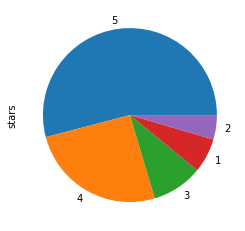

In [13]:
reviews1.stars.value_counts().plot.pie()
plt.show()

## Location

In [14]:
#Top 10 cities where reviewers are from
reviews1.location.value_counts().head(10)

Irvine, CA              2474
Los Angeles, CA         1201
Santa Ana, CA            938
Tustin, CA               881
Costa Mesa, CA           774
Anaheim, CA              750
Orange, CA               638
Huntington Beach, CA     560
Orange County, CA        547
San Diego, CA            505
Name: location, dtype: int64

In [15]:
#Top 5 states where reviewers are from
reviews1['state'].value_counts(normalize=True).head()

CA    0.892935
TX    0.012537
NY    0.010726
NV    0.010392
AZ    0.008962
Name: state, dtype: float64

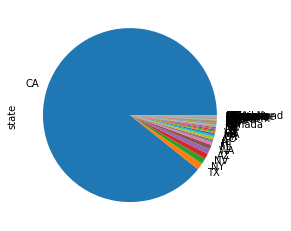

In [16]:
reviews1['state'].value_counts().plot.pie()
plt.show()

## numfriends

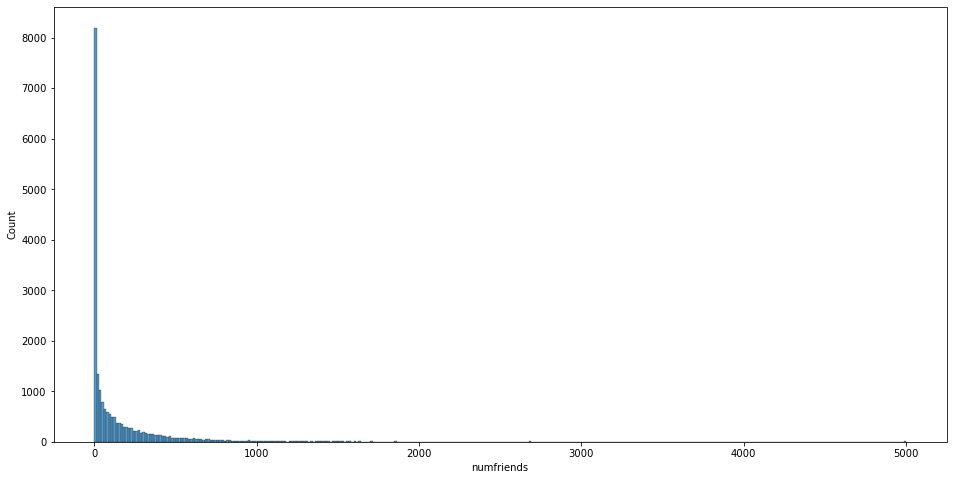

In [17]:
plt.figure(figsize=(16,8))
sns.histplot(data=reviews1, x="numfriends")
#plt.xlim([0, 2000])
plt.show()


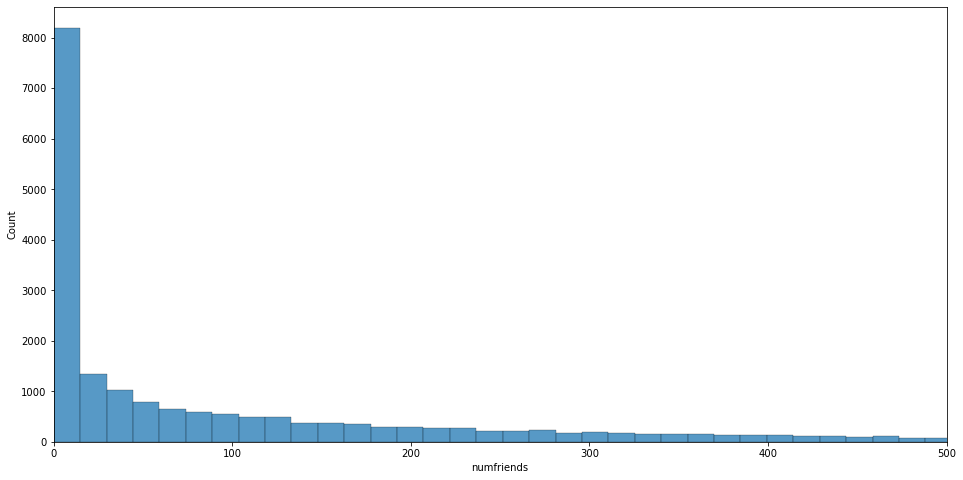

In [18]:
plt.figure(figsize=(16,8))
sns.histplot(data=reviews1, x="numfriends")
plt.xlim([0, 500])
plt.show()

## stars and numfriends

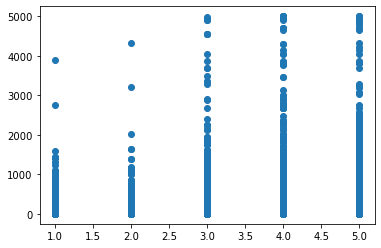

In [19]:
plt.scatter(reviews1.stars,reviews1.numfriends)
plt.show()

In [20]:
reviews1[['stars','numfriends']].corr()

,stars,numfriends
stars,1.00000,0.02548
numfriends,0.02548,1.00000


<AxesSubplot:xlabel='stars'>

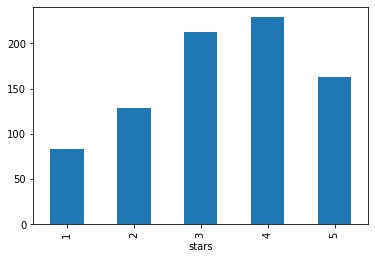

In [21]:
reviews1.groupby('stars')['numfriends'].mean().plot.bar()

<AxesSubplot:xlabel='stars'>

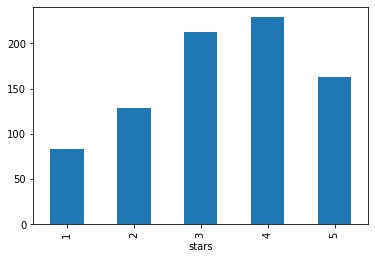

In [22]:
reviews1.groupby('stars')['numfriends'].mean().plot.bar()

In [ ]:
#Word length

In [23]:
word_count = []
for row in reviews1.content.index:
    word_count.append(len([i for i in reviews1.content[row].split(' ')]))

In [ ]:
#word_count

In [24]:
reviews1['word_count']=word_count

<ipython-input-24-2f90f2f67666>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews1['word_count']=word_count


In [25]:
reviews1.head()

,username,location,date,stars,content,numfriends,restaurantname,state,word_count
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA,18
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA,23
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA,463
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA,247
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA,339


In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

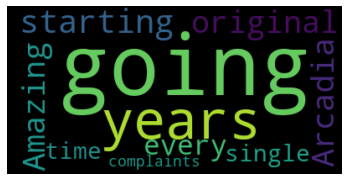

In [27]:
# Start with one review:
text = reviews1.content[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
text = " ".join(content for content in reviews1.content)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 11797180 words in the combination of all review.


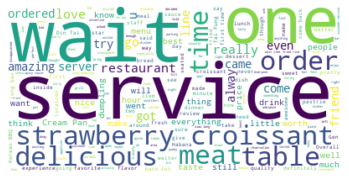

In [29]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["food", "eat", "good", "great", "place" ])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
fivestarrating = reviews1.loc[reviews1['stars'] == 5]

In [97]:
text = " ".join(content for content in fivestarrating.content)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5147599 words in the combination of all review.


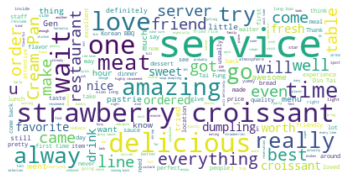

In [98]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["food", "eat", "good", "great", "place" ])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
fourstarrating = reviews1.loc[reviews1['stars'] == 4]

There are 3519916 words in the combination of all review.


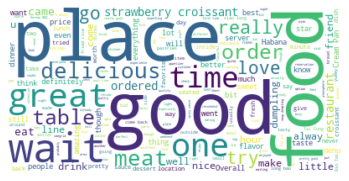

In [43]:
text = " ".join(content for content in fourstarrating.content)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["service", "got"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
threestarrating = reviews1.loc[reviews1['stars'] == 3]

There are 1475295 words in the combination of all review.


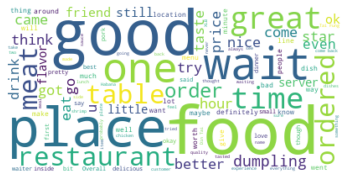

In [45]:
text = " ".join(content for content in threestarrating.content)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["service", "really"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
twostarrating = reviews1.loc[reviews1['stars'] == 2]

There are 758062 words in the combination of all review.


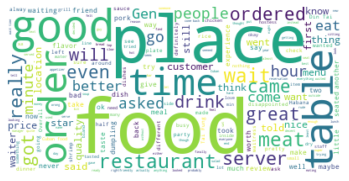

In [58]:
text = " ".join(content for content in twostarrating.content)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["service", "one" , "u","us"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
onestarrating = reviews1.loc[reviews1['stars'] == 1]

There are 896304 words in the combination of all review.


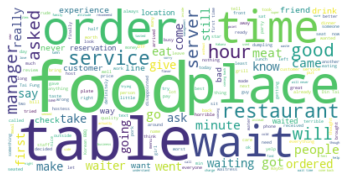

In [51]:
text = " ".join(content for content in onestarrating.content)
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["n", "one" , "even","told" , "said", "u" , "us"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [139]:
from PIL import Image
review_mask = np.array(Image.open('/Users/akshayganesh/Downloads/ONE.png'))
review_mask


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [135]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [136]:
# Transform your mask into a new one that will work with the function:
transformed_review_mask = np.ndarray((review_mask.shape[0],review_mask.shape[1]), np.int32)

for i in range(len(review_mask)):
    transformed_review_mask[i] = list(map(transform_format, review_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
transformed_review_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [68]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=review_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

KeyboardInterrupt: 

In [91]:
reviews1.tail()

,username,location,date,stars,content,numfriends,restaurantname,state,word_count
20980,Rick P.,"Long Beach, CA",7/5/06,3,i agree with eugenia c. when she says the serv...,198,Habana,CA,61
20981,Shannon W.,"Costa Mesa, CA",2/24/13,1,"Ok, I understand why this place gets the revie...",0,Habana,CA,366
20982,Thenameisfood T.,"Hacienda Heights, CA",9/11/12,4,pretty good food! bit pricey.. the Cuban Food ...,514,Habana,CA,27
20983,Brett M.,"Huntington Beach, CA",3/14/10,5,"very cool dark romantic restaurant, great food...",1,Habana,CA,24
20984,Alexis S.,"Anaheim, CA",5/12/10,3,meh. this place is alright. its a bit on the p...,2,Habana,CA,101


In [80]:
DTF = reviews1.loc[reviews1['restaurantname'] == 'Din Tai Fung']

There are 3613648 words in the combination of all review.


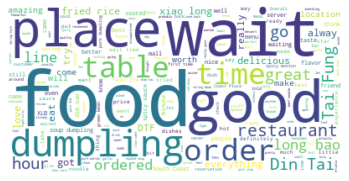

In [93]:
text = " ".join(content for content in DTF.content)
print ("There are {} words in the combination of all review.".format(len(text)))

#stopwords = set(STOPWORDS)
#stopwords.update(["service", "one" , "u","us"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [87]:
CP = reviews1.loc[reviews1['restaurantname'] == 'Cream Pan']

There are 2508042 words in the combination of all review.


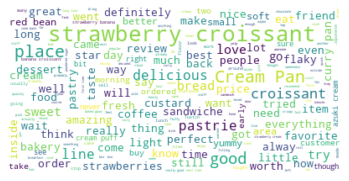

In [94]:
text = " ".join(content for content in CP.content)
print ("There are {} words in the combination of all review.".format(len(text)))

#stopwords = set(STOPWORDS)
#stopwords.update(["service", "one" , "u","us"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
GKBH = reviews1.loc[reviews1['restaurantname'] == 'Gen Korean BBQ House']

There are 2905972 words in the combination of all review.


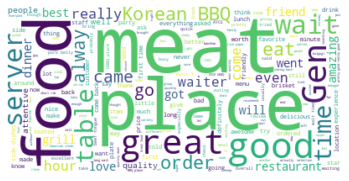

In [95]:
text = " ".join(content for content in GKBH.content)
print ("There are {} words in the combination of all review.".format(len(text)))

#stopwords = set(STOPWORDS)
#stopwords.update(["service", "one" , "u","us"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
HB = reviews1.loc[reviews1['restaurantname'] == 'Habana']

There are 2769515 words in the combination of all review.


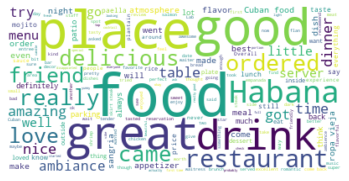

In [96]:
text = " ".join(content for content in HB.content)
print ("There are {} words in the combination of all review.".format(len(text)))

#stopwords = set(STOPWORDS)
#stopwords.update(["service", "one" , "u","us"])



# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()